In [56]:
# Dependencies and setup
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats as st
import numpy as np

from scipy.stats import sem

wine_file = "Resources/clean_winemag_data.csv"

In [57]:
# Create dataframe
wine_df =pd.read_csv(wine_file, index_col=0)

wine_df.head()

,Bottle Name,Type,Winery,Designation,Region,Province,Country,Price,Rating,Sommelier,Sommelier Twitter Handle,Description
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Avidagos,NaN,Douro,Portugal,15.0,87.0,Roger Voss,@vossroger,"This is ripe and fruity, a wine that is smooth..."
2,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,NaN,Willamette Valley,Oregon,US,14.0,87.0,Paul Gregutt,@paulgwine,"Tart and snappy, the flavors of lime flesh and..."
3,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Reserve Late Harvest,Lake Michigan Shore,Michigan,US,13.0,87.0,Alexander Peartree,NaN,"Pineapple rind, lemon pith and orange blossom ..."
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Vintner's Reserve Wild Child Block,Willamette Valley,Oregon,US,65.0,87.0,Paul Gregutt,@paulgwine,"Much like the regular bottling from 2012, this..."
5,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Ars In Vitro,Navarra,Northern Spain,Spain,15.0,87.0,Michael Schachner,@wineschach,Blackberry and raspberry aromas show a typical...


## Examine number of ratings per wine variety.

In [58]:
# Count unique wine types
unique_wine_types = wine_df['Type'].unique()
# unique_wine_types

count_unique_wine_types = len(unique_wine_types)
count_unique_wine_types

691

In [59]:
# Use groupby and summary statistical methods to calculate the following properties of each wine type: 
# mean, median, variance, standard deviation, and SEM of the rating. 

mean_wine_rating = wine_df.groupby(['Type'])['Rating'].mean()
median_wine_rating = wine_df.groupby(['Type'])['Rating'].median()
var_wine_rating = wine_df.groupby(['Type'])['Rating'].var()
sd_wine_rating = wine_df.groupby(['Type'])['Rating'].std()
sem_wine_rating = wine_df.groupby(['Type'])['Rating'].sem()
count_wine_rating = wine_df.groupby(['Type'])['Rating'].count()

wine_type_df = pd.DataFrame({
    'Number of Ratings': count_wine_rating,
    'Mean Wine Rating': mean_wine_rating,
    'Median Wine Rating': median_wine_rating,
    'Wine Rating Variance': var_wine_rating,
    'Wine Rating St. Dev.': sd_wine_rating,
    'Wine Rating St. Error': sem_wine_rating
})

wine_type_df

,Number of Ratings,Mean Wine Rating,Median Wine Rating,Wine Rating Variance,Wine Rating St. Dev.,Wine Rating St. Error
Type,,,,,,
Abouriou,3,87.666667,87.0,9.333333,3.055050,1.763834
Agiorgitiko,63,87.031746,87.0,3.966718,1.991662,0.250926
Aglianico,294,89.397959,89.0,6.636310,2.576104,0.150241
Aidani,1,82.000000,82.0,NaN,NaN,NaN
Airen,3,81.666667,82.0,2.333333,1.527525,0.881917
...,...,...,...,...,...,...
Zinfandel,2708,87.826809,88.0,9.669661,3.109608,0.059756
Zlahtina,2,86.000000,86.0,8.000000,2.828427,2.000000
Zweigelt,182,88.500000,89.0,4.693370,2.166419,0.160586


In [60]:
# Sort descending by Number of Ratings
wine_type_df = wine_type_df.sort_values('Number of Ratings', ascending=False).reset_index()

wine_type_df.head(15)

,Type,Number of Ratings,Mean Wine Rating,Median Wine Rating,Wine Rating Variance,Wine Rating St. Dev.,Wine Rating St. Error
0,Pinot Noir,12785,89.409230,90.0,9.807800,3.131741,0.027697
1,Chardonnay,11077,88.302880,88.0,10.464864,3.234944,0.030737
2,Cabernet Sauvignon,9384,88.610294,88.0,11.035260,3.321936,0.034292
3,Red Blend,8466,88.379754,88.0,7.849745,2.801740,0.030450
4,Bordeaux-style Red Blend,5340,88.792135,89.0,9.456690,3.075173,0.042082
5,Riesling,4971,89.439147,89.0,8.154596,2.855625,0.040502
6,Sauvignon Blanc,4780,87.406904,87.0,7.185096,2.680503,0.038771
7,Syrah,4086,89.290749,90.0,9.283376,3.046863,0.047665
8,Rosé,3261,86.885925,87.0,6.455694,2.540806,0.044493
9,Merlot,3061,87.199935,87.0,8.811647,2.968442,0.053653


In [61]:
# Create new DataFrame of top 15 wine types with most number of ratings
wine_type_ratings_df = wine_type_df.head(15)

# Add column of wine color
list_of_wine_colors = ["Red","White","White","Red","Red","White","White","Red","Pink","Red","Red","Red","Red","Red","Red"]
wine_type_ratings_df['Color'] = list_of_wine_colors

# Move Color column after Type
# wine_type_ratings_df.columns to easily get column names to copy/paste
wine_type_ratings_df = wine_type_ratings_df[['Type','Color','Number of Ratings','Mean Wine Rating','Median Wine Rating','Wine Rating Variance','Wine Rating St. Dev.','Wine Rating St. Error']]
wine_type_ratings_df

C:\Users\User\AppData\Local\Temp\ipykernel_6092\1059938743.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_type_ratings_df['Color'] = list_of_wine_colors


,Type,Color,Number of Ratings,Mean Wine Rating,Median Wine Rating,Wine Rating Variance,Wine Rating St. Dev.,Wine Rating St. Error
0,Pinot Noir,Red,12785,89.409230,90.0,9.807800,3.131741,0.027697
1,Chardonnay,White,11077,88.302880,88.0,10.464864,3.234944,0.030737
2,Cabernet Sauvignon,White,9384,88.610294,88.0,11.035260,3.321936,0.034292
3,Red Blend,Red,8466,88.379754,88.0,7.849745,2.801740,0.030450
4,Bordeaux-style Red Blend,Red,5340,88.792135,89.0,9.456690,3.075173,0.042082
5,Riesling,White,4971,89.439147,89.0,8.154596,2.855625,0.040502
6,Sauvignon Blanc,White,4780,87.406904,87.0,7.185096,2.680503,0.038771
7,Syrah,Red,4086,89.290749,90.0,9.283376,3.046863,0.047665
8,Rosé,Pink,3261,86.885925,87.0,6.455694,2.540806,0.044493
9,Merlot,Red,3061,87.199935,87.0,8.811647,2.968442,0.053653


C:\Users\User\AppData\Local\Temp\ipykernel_6092\2546608996.py:11: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  red_patch = mpatches.Patch(color='darkred', edgecolor='black', label="Red")
C:\Users\User\AppData\Local\Temp\ipykernel_6092\2546608996.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  white_patch = mpatches.Patch(color='lemonchiffon', edgecolor='black', label="White")
C:\Users\User\AppData\Local\Temp\ipykernel_6092\2546608996.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  pink_patch = mpatches.Patch(color='palevioletred', edgecolor='black', label="Pink")


Text(0, 0.5, '# of Ratings')

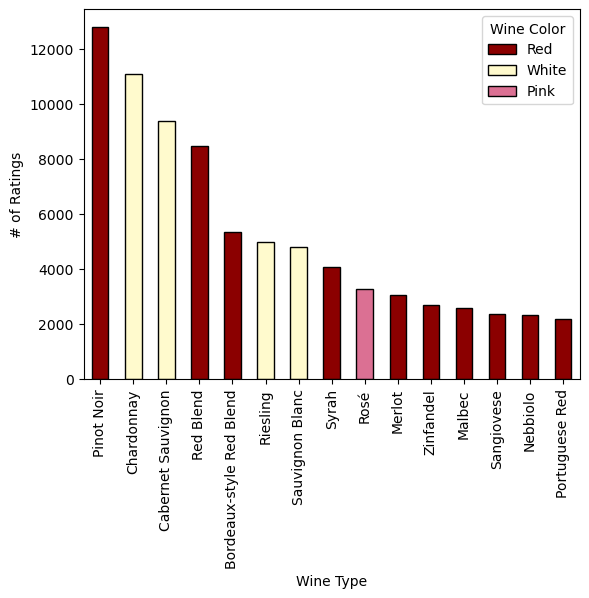

In [62]:
# Plot bar chart of top 15 wine types with most number of ratings

# Set bar colors based on wine color
wine_colors = wine_type_ratings_df['Color']
wine_chart_colors = [{c=="Red":'darkred',c=="White":'lemonchiffon',c=="Pink":'palevioletred'}[True] for c in wine_colors]

# Bar chart setup
wine_type_bar_chart = wine_type_ratings_df.plot.bar(x='Type', y='Number of Ratings', rot=90, color=wine_chart_colors, edgecolor='black')

# Set legend based on wine color using mpatches
red_patch = mpatches.Patch(color='darkred', edgecolor='black', label="Red")
white_patch = mpatches.Patch(color='lemonchiffon', edgecolor='black', label="White")
pink_patch = mpatches.Patch(color='palevioletred', edgecolor='black', label="Pink")
handles = [red_patch, white_patch, pink_patch]

for i, handle in enumerate(handles):
    handle.set_edgecolor('black')

# Plot bar chart
plt.legend(
    title = "Wine Color",
    handles = handles, 
    loc = 'best'
)

plt.xlabel("Wine Type")
plt.ylabel("# of Ratings")

#  # Save chart to .png file
# plt.savefig('el_charts/wine_type_bar_chart')

# Analysis:

The top most rated wine types all have at least 2,000 reviews, with the most-rated wine variety being Pinot Noir with 12,785 reviews. As evidenced by the bar chart, most of the most-reviewed wine types are red wines, with only 4 of the 15 being white wines and 1 a rose.

# Is there a pattern in reviewers' average/median wine ratings?

In [63]:
# Create list of unique sommeliers
unique_soms = list(wine_df['Sommelier'].unique())

# Remove null value ("nan") from list of unique sommeliers
unique_soms.pop(8)
print(unique_soms)

['Roger Voss', 'Paul Gregutt', 'Alexander Peartree', 'Michael Schachner', 'Kerin O’Keefe', 'Anna Lee C. Iijima', 'Virginie Boone', 'Matt Kettmann', 'Sean P. Sullivan', 'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW', 'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen', 'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams', 'Christina Pickard']


In [64]:
# Count number of unique sommeliers
count_unique_soms = len(unique_soms)
count_unique_soms

19

In [65]:
# Use groupby and summary statistical methods to calculate the following properties of each sommelier rating: 
# mean, median, variance, standard deviation, and SEM of the rating. 

count_som_rating = wine_df.groupby(['Sommelier'])['Rating'].count()
mean_som_rating = wine_df.groupby(['Sommelier'])['Rating'].mean()
median_som_rating = wine_df.groupby(['Sommelier'])['Rating'].median()
highest_som_rating = wine_df.groupby(['Sommelier'])['Rating'].max()
lowest_som_rating = wine_df.groupby(['Sommelier'])['Rating'].min()
mean_som_price = wine_df.groupby(['Sommelier'])['Price'].mean()
median_som_price = wine_df.groupby(['Sommelier'])['Price'].median()
highest_som_price = wine_df.groupby(['Sommelier'])['Price'].max()
lowest_som_price = wine_df.groupby(['Sommelier'])['Price'].min()


som_df = pd.DataFrame({
    'Number of Ratings': count_som_rating,
    'Mean Wine Rating': mean_som_rating,
    'Median Wine Rating': median_som_rating,
    'Highest Wine Rating': highest_som_rating,
    'Lowest Wine Rating': lowest_som_rating,
    'Mean Wine Price': mean_som_price,
    'Median Wine Price': median_som_price,
    'Highest Wine Price': highest_som_price,
    'Lowest Wine Price': lowest_som_price
}).reset_index()

som_df.head(20)

,Sommelier,Number of Ratings,Mean Wine Rating,Median Wine Rating,Highest Wine Rating,Lowest Wine Rating,Mean Wine Price,Median Wine Price,Highest Wine Price,Lowest Wine Price
0,Alexander Peartree,413,85.854722,86.0,91.0,80.0,29.053269,25.0,250.0,11.0
1,Anna Lee C. Iijima,4369,88.405127,88.0,98.0,80.0,29.790112,22.0,775.0,4.0
2,Anne Krebiehl MW,3389,90.612570,90.0,97.0,80.0,31.244910,25.0,1100.0,10.0
3,Carrie Dykes,138,86.384058,87.0,92.0,81.0,30.753623,28.0,75.0,14.0
4,Christina Pickard,6,87.833333,88.0,93.0,82.0,29.333333,28.5,50.0,19.0
5,Fiona Adams,27,86.888889,87.0,91.0,82.0,31.148148,27.0,80.0,17.0
6,Jeff Jenssen,469,88.328358,89.0,97.0,82.0,22.313433,16.0,320.0,6.0
7,Jim Gordon,4171,88.625989,89.0,97.0,80.0,26.935507,23.0,220.0,4.0
8,Joe Czerwinski,5010,88.540519,89.0,100.0,80.0,35.182036,22.0,850.0,5.0
9,Kerin O’Keefe,9874,88.908750,89.0,100.0,80.0,41.953413,30.0,800.0,6.0


Text(0.5, 1.0, 'Highest and Lowest Wine Ratings by Sommelier')

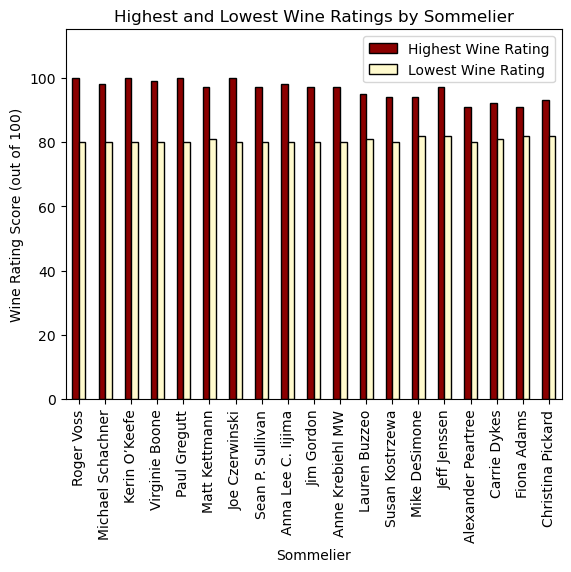

In [88]:
# Show bar graph of highest and lowest wine ratings by sommelier, sorted by number of ratings
sorted_som_df = som_df.sort_values('Number of Ratings', ascending=False)

# Set bar colors based on wine color
som_ratings_colors = ['darkred', 'lemonchiffon']

# Bar chart setup
som_ratings_bar_chart = sorted_som_df.plot.bar(x='Sommelier', y=['Highest Wine Rating', 'Lowest Wine Rating'], rot=90, color=som_ratings_colors, edgecolor='black')

plt.ylim(0, 115)
plt.xlabel("Sommelier")
plt.ylabel("Wine Rating Score (out of 100)")
plt.title("Highest and Lowest Wine Ratings by Sommelier")

# # Save chart to .png file
# plt.savefig('som_ratings_bar_chart')

Text(0.5, 1.0, 'Highest and Lowest Wine Prices by Sommelier')

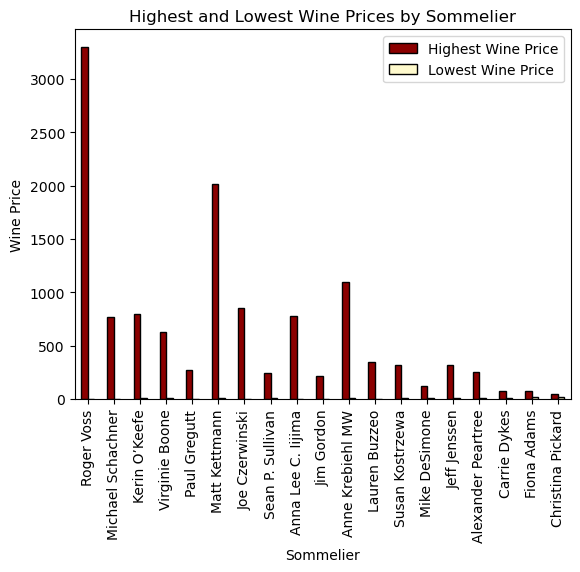

In [67]:
# Show bar graph of highest and lowest wine prices by sommelier, sorted by number of ratings

# Set bar colors based on wine color
som_ratings_colors = ['darkred', 'lemonchiffon']

# Bar chart setup
som_prices_bar_chart = sorted_som_df.plot.bar(x='Sommelier', y=['Highest Wine Price', 'Lowest Wine Price'], rot=90, color=som_ratings_colors, edgecolor='black')

plt.xlabel("Sommelier")
plt.ylabel("Wine Price")
plt.title("Highest and Lowest Wine Prices by Sommelier")

# # Save chart to .png file
# plt.savefig('som_price_bar_chart')

In [68]:
# Define a function to create Linear Regression plots for som_df 
def linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The correlation is {rvalue}")
    plt.scatter(x, y, c="darkred")
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define function for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=13,color="red")

The correlation is 0.27635928298995294


Text(0.5, 1.0, 'Correlation between Number of Ratings and Avg. Wine Rating')

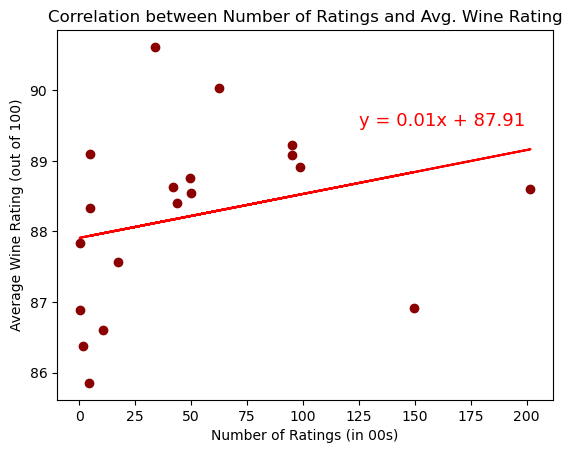

In [69]:
# Show correlation between Number of Ratings and Average Wine Rating 
equation = linear_regression(som_df['Number of Ratings'] / 100, som_df['Mean Wine Rating'])

annotate(equation, 125, 89.5)

plt.xlabel("Number of Ratings (in 00s)")
plt.ylabel("Average Wine Rating (out of 100)")
plt.title("Correlation between Number of Ratings and Avg. Wine Rating")

# # Save chart to .png file
# plt.savefig("som_correlation_1_chart.png")

The correlation is 0.5062098767761122


Text(0.5, 1.0, 'Correlation between Number of Ratings and Avg. Wine Price')

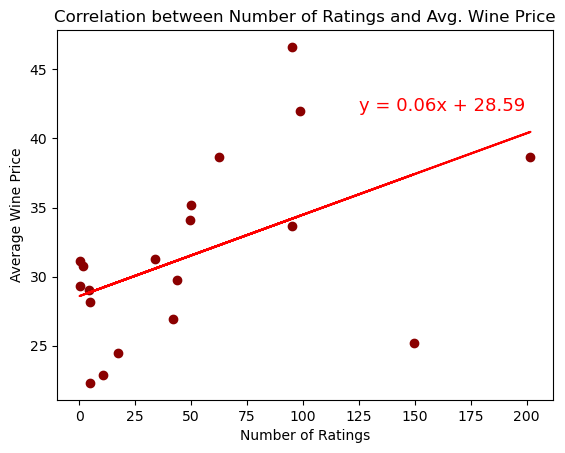

In [70]:
# Show correlation between Number of Ratings and Average Wine Price
equation = linear_regression(som_df['Number of Ratings'] / 100, som_df['Mean Wine Price'])

annotate(equation, 125, 42)

plt.xlabel("Number of Ratings")
plt.ylabel("Average Wine Price")
plt.title("Correlation between Number of Ratings and Avg. Wine Price")

# # Save chart to .png file
# plt.savefig("som_correlation_2_chart.png")

# Anaylsis:

The 19 sommeliers that reviewed the wines in the dataset generally had very similar averages and medians in their ratings. None of the sommeliers gave a rating below 80 (out of 100), and four rated wines at 100. When looking at the correlation between the number of ratings per sommelier and the average wine rating (out of 100), the correlation coefficient is 0.28. Since this is not close to either 1 or -1 to suggest a perfect correlation, this indicates that the number of reviews that a sommelier has completed does not correlate to the rating they prescribe.

The same cannot be said for each sommelier's range in wine prices. The highest wine price at $3,300 was reviewed by Roger Voss, with the second highest price of $2,013 reviewed by Matt Kettmann. Many of the reviewers, including Roger Voss and Matt Kettmann, reviewed wines below $10, suggesting that these sommeliers are not necessarily picking about the price of the wines they rate. That said, the correlation coefficient between the number of ratings and the average wine price is 0.51. While this still isn't a perfect correlation, it does suggest that there is a slight pattern that the more wines one reviews, the most expensive the average price per bottle. 

## Specifically Roger Voss

In [71]:
roger_voss_df = wine_df[wine_df['Sommelier'] == "Roger Voss"].reset_index(drop=True)
roger_voss_df.head()

,Bottle Name,Type,Winery,Designation,Region,Province,Country,Price,Rating,Sommelier,Sommelier Twitter Handle,Description
0,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Avidagos,NaN,Douro,Portugal,15.0,87.0,Roger Voss,@vossroger,"This is ripe and fruity, a wine that is smooth..."
1,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,NaN,Alsace,Alsace,France,24.0,87.0,Roger Voss,@vossroger,This dry and restrained wine offers spice in p...
2,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,Les Natures,Alsace,Alsace,France,27.0,87.0,Roger Voss,@vossroger,This has great depth of flavor with its fresh ...
3,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer,NaN,Alsace,Alsace,France,30.0,87.0,Roger Voss,@vossroger,"This is a dry wine, very spicy, with a tight, ..."
4,Henry Fessy 2012 Nouveau (Beaujolais),Gamay,Henry Fessy,Nouveau,Beaujolais,Beaujolais,France,9.0,86.0,Roger Voss,@vossroger,"This is a festive wine, with soft, ripe fruit ..."


The correlation is 0.41237518129721434


Text(0.5, 1.0, "Roger Voss' Correlation between Wine Rating and Price")

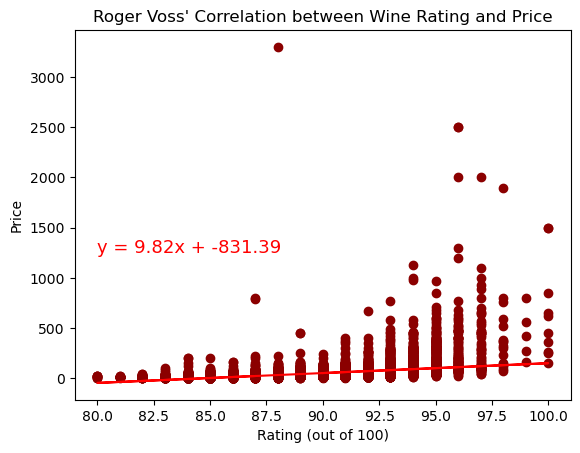

In [72]:
# Using earlier linear_regression function, find correlation between Rating and Wine Price for Roger Voss
equation = linear_regression(roger_voss_df['Rating'], roger_voss_df['Price'])

annotate(equation, 80, 1250)

plt.xlabel("Rating (out of 100)")
plt.ylabel("Price")
plt.title(f"Roger Voss' Correlation between Wine Rating and Price")

# # Save chart to .png file
# plt.savefig("roger_voss_correlation_1_chart.png")

In [73]:
# Create new Roger Voss DataFrame sorted descending by wine price 
sorted_roger_voss_df = roger_voss_df.sort_values('Price', ascending=False).reset_index()
sorted_roger_voss_df.head()

,index,Bottle Name,Type,Winery,Designation,Region,Province,Country,Price,Rating,Sommelier,Sommelier Twitter Handle,Description
0,12674,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet,NaN,Médoc,Bordeaux,France,3300.0,88.0,Roger Voss,@vossroger,This ripe wine shows plenty of blackberry frui...
1,2466,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,Château Pétrus,NaN,Pomerol,Bordeaux,France,2500.0,96.0,Roger Voss,@vossroger,The wine is a velvet glove in an iron fist. Th...
2,15400,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair,NaN,La Romanée,Burgundy,France,2500.0,96.0,Roger Voss,@vossroger,"A superb wine from a great year, this is power..."
3,17686,Domaine du Comte Liger-Belair 2005 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair,NaN,La Romanée,Burgundy,France,2000.0,96.0,Roger Voss,@vossroger,"A wonderfully complete wine, with all the elem..."
4,10273,Château Pétrus 2011 Pomerol,Bordeaux-style Red Blend,Château Pétrus,NaN,Pomerol,Bordeaux,France,2000.0,97.0,Roger Voss,@vossroger,This extravagantly perfumed wine has great jui...


In [74]:
# Determine which wines are outliers
price = sorted_roger_voss_df['Price']
quartiles = price.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of wine prices is: {lowerq}")
print(f"The upper quartile of wine prices is: {upperq}")
print(f"The interquartile range of wine is: {iqr}")
print(f"The the median of wine is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of wine prices is: 15.0
The upper quartile of wine prices is: 40.0
The interquartile range of wine is: 25.0
The the median of wine is: 22.0 
Values below -22.5 could be outliers.
Values above 77.5 could be outliers.


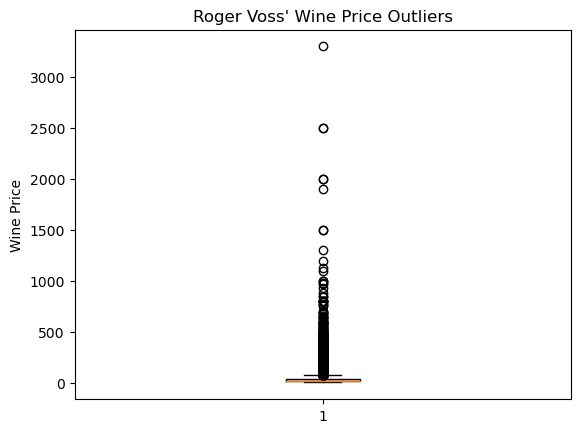

In [22]:
# Plot box and whiskers chart to show outliers (ugly chart)
wine_prices = sorted_roger_voss_df['Price']

fig1, ax1 = plt.subplots()
ax1.set_title("Roger Voss' Wine Price Outliers")
ax1.set_ylabel("Wine Price")
ax1.boxplot(wine_prices)
plt.show()

In [84]:
# Smaller sample of Roger Voss' data
roger_voss_sample_df = roger_voss_df.sample(50)

The correlation is 0.5095872143525


Text(0.5, 1.0, "Roger Voss' Correlation between Wine Rating and Price (sample of 50)")

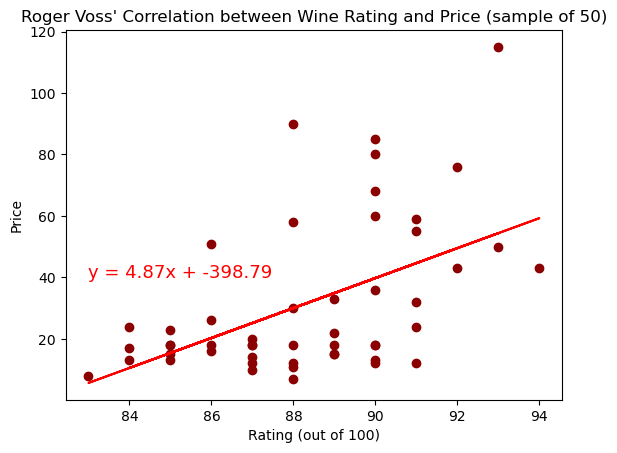

In [86]:
# Using earlier linear_regression function, find correlation between Rating and Wine Price for Roger Voss's sample data set
equation = linear_regression(roger_voss_sample_df['Rating'], roger_voss_sample_df['Price'])

annotate(equation, 83, 40)

plt.xlabel("Rating (out of 100)")
plt.ylabel("Price")
plt.title(f"Roger Voss' Correlation between Wine Rating and Price (sample of 50)")

# # Save chart to .png file
# plt.savefig("roger_voss_correlation_2_chart.png")

# Analysis:

We decided to specifically analyze Roger Voss' data, the sommelier who reviewed the most number of wines (20K+), as well as reviewed the most expensive bottle ($3,300). In calculating the correlation between rating and bottle price in his entire dataset, the coefficient is 0.41, suggesting that there is a slight, but not very strong, correlation between the price of the bottle and the rating he gives that bottle. 

In trying to determine which wines might be outliers based on price, we discovered that the interquartile range is too small, and many of the bottles would be considered outliers. As such, the box and whiskers graph was illegible and unhelpful in our analysis. 

We then took a smaller sample of 50 of Roger Voss' data, which yielded a correlation of 0.51 (as of 5/16/2023). This is not too dissimilar to the entire Roger Voss dataset correlation of 0.41, and therefore we deem that the sample is appropriate. We also found the scatter chart of the sample size more legible than the entire dataset. 

## Sommeliers and Twitter

In [89]:
# Create DataFrame only of sommeliers' names and Twitter handles
som_twitter_df = wine_df[['Sommelier','Sommelier Twitter Handle']].copy()
som_twitter_df = som_twitter_df.sort_values('Sommelier', ascending=True)
som_twitter_df = som_twitter_df.drop_duplicates(subset='Sommelier', keep="first").reset_index()
som_twitter_df = som_twitter_df.drop(som_twitter_df.columns[0], axis=1)
som_twitter_df = som_twitter_df.fillna('N/A')

# Merge som_df and som_twitter_df
som_df = pd.merge(som_df, som_twitter_df, on='Sommelier', how="inner")
som_df

,Sommelier,Number of Ratings,Mean Wine Rating,Median Wine Rating,Highest Wine Rating,Lowest Wine Rating,Mean Wine Price,Median Wine Price,Highest Wine Price,Lowest Wine Price,Sommelier Twitter Handle
0,Alexander Peartree,413,85.854722,86.0,91.0,80.0,29.053269,25.0,250.0,11.0,N/A
1,Anna Lee C. Iijima,4369,88.405127,88.0,98.0,80.0,29.790112,22.0,775.0,4.0,N/A
2,Anne Krebiehl MW,3389,90.612570,90.0,97.0,80.0,31.244910,25.0,1100.0,10.0,@AnneInVino
3,Carrie Dykes,138,86.384058,87.0,92.0,81.0,30.753623,28.0,75.0,14.0,N/A
4,Christina Pickard,6,87.833333,88.0,93.0,82.0,29.333333,28.5,50.0,19.0,@winewchristina
5,Fiona Adams,27,86.888889,87.0,91.0,82.0,31.148148,27.0,80.0,17.0,@bkfiona
6,Jeff Jenssen,469,88.328358,89.0,97.0,82.0,22.313433,16.0,320.0,6.0,@worldwineguys
7,Jim Gordon,4171,88.625989,89.0,97.0,80.0,26.935507,23.0,220.0,4.0,@gordone_cellars
8,Joe Czerwinski,5010,88.540519,89.0,100.0,80.0,35.182036,22.0,850.0,5.0,@JoeCz
9,Kerin O’Keefe,9874,88.908750,89.0,100.0,80.0,41.953413,30.0,800.0,6.0,@kerinokeefe


In [90]:
# Count how many sommeliers do and do not have Twitter accounts
soms_w_twitter = len(som_df[som_df['Sommelier Twitter Handle'].str.contains("@")])
soms_wo_twitter = len(som_df[som_df['Sommelier Twitter Handle'].str.contains("N/A")])

print(f" There are {soms_w_twitter} sommeliers with Twitter accounts, and {soms_wo_twitter} sommeliers without Twitter accounts.")

 There are 16 sommeliers with Twitter accounts, and 3 sommeliers without Twitter accounts.


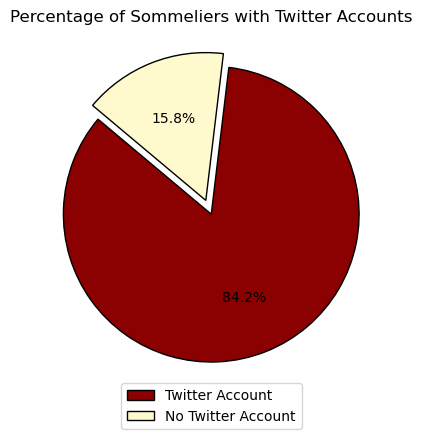

In [91]:
# Create pie chart of sommeliers that have and don't have Twitter accounts

labels = ["Twitter Account", "No Twitter Account"]
sizes = [soms_w_twitter, soms_wo_twitter]
colors = ['darkred', 'lemonchiffon']
explode = (0, 0.1)

som_twitter_pie_chart = plt.pie(sizes, colors=colors, explode=explode, autopct="%1.1f%%", startangle=140,
        wedgeprops = {"edgecolor" : "black"}
)
plt.title("Percentage of Sommeliers with Twitter Accounts")
plt.legend(labels, loc="lower center", bbox_to_anchor=(0.5,-0.1))
plt.show()

# # Save chart to .png file
# plt.savefig('som_twitter_pie_chart')

# Analysis

There was not much analysis we felt was necessary regarding the sommeliers and their Twitter handle information. We found that most of the sommeliers (84%) have public twitter accounts, and only 3 do not.